In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import dump
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
import Py_FTP_Langevin as ftp
import ftp_support

In [4]:
k_B = 1.38066e-23    #! Boltzmann constant in (J/K)
Na = 6.02214076 * pow(10,23) # 1/mol

In [5]:
fontsize_axis = 20
fontsize_legend = 16
fontsize_ticks = 14

# First time passage simulations

In [6]:
#//! *********** PARAMETERS PARTICLE PROPERTIES *********** !
MM,Rho_p,epsilon_lj,sigma_lj,A = ftp_support.Get_params_particles("Soot")

#//! *********** SIMULATION PARAMETERS *********** !
N_runs = 100 #;
Box_L_factor_dmax = 50. #4 #; //! Box size as factor of D_p
T_g = 1700. #;            //! Fluid temperature
P_g = 101300. #;          //! Fluid pressure

In [7]:
Dp = np.logspace(np.log10(1),np.log10(1e+03),10) * (1e-09)
#Dp = np.logspace(np.log10(1),np.log10(1e+03),100) * (1e-09)

In [8]:
# Potential well analysis
e_well_i = np.zeros(len(Dp)**2)
r_e_well_i = np.zeros(len(Dp)**2)
factor_vdw_i = np.zeros(len(Dp)**2)
Dp_red = np.zeros(len(Dp)**2)
Dp_avg = np.zeros(len(Dp)**2)

k_BT = k_B * T_g
k=0

for i in range(len(Dp)):
    for j in range(len(Dp)):
        Dp_avg[k] = (Dp[i]+Dp[j]) * 0.5
        Dp_red[k] = (Dp[i]*Dp[j])/(Dp[i]+Dp[j])
        e_well,r_e_well = ftp_support.Determine_pot_well(Dp[i],Dp[j],A,sigma_lj,k_BT)
        e_well_i[k] = e_well
        r_e_well_i[k] = r_e_well
        factor_vdw_i[k] = 1+r_e_well/(0.5*(Dp[i]+Dp[i]))
        k=k+1

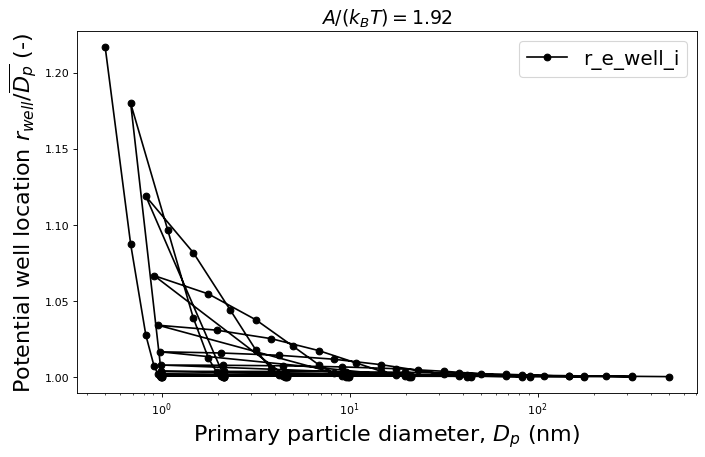

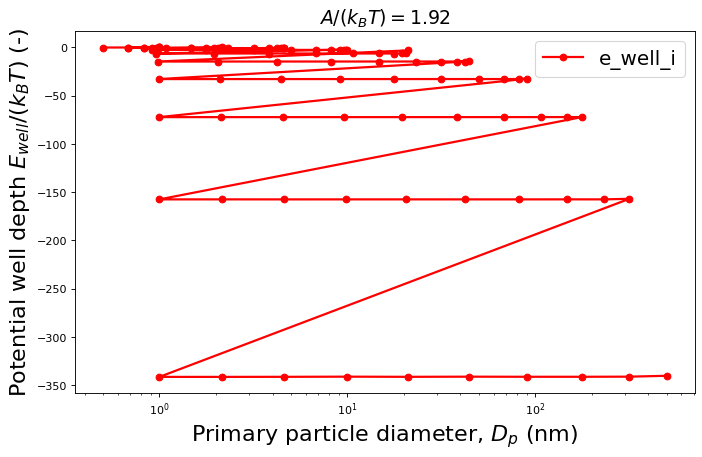

(<matplotlib.legend.Legend at 0x7ff094b19d90>, None)

In [12]:
fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(Dp_red*1e+09,r_e_well_i/Dp_avg,"o-k",label="r_e_well_i")
title = "$A/(k_BT)=$"+str(round(A/(k_B*T_g),2))
plt.title(title,fontsize=17); plt.xscale("log")
ax1.set_ylabel('Potential well location $r_{well}/\overline{D_p}$ (-)', fontsize=20)
ax1.set_xlabel('Primary particle diameter, $D_p$ (nm)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()

fig, ax1 = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(Dp_red*1e+09,e_well_i,"o-r", linewidth=2,label="e_well_i")
#ax1.plot(Dp*1e+09,r_e_well_i/Dp,".-k",label="r_e_well_i")
title = "$A/(k_BT)=$"+str(round(A/(k_B*T_g),2))
plt.title(title,fontsize=17); plt.xscale("log")
ax1.set_ylabel('Potential well depth $E_{well}/(k_BT)$ (-)', fontsize=20)
ax1.set_xlabel('Primary particle diameter, $D_p$ (nm)', fontsize=20)
plt.legend(fontsize=18, loc=0), plt.show()